## Marketing Analytics of MP3 Player

The goal of this project is to:

* Examine the factors that determine demand for MP3 Player
* Understand the role of sales discount in promoting sales
* Analyze sales revenue with respect to the socio-demographic characteristics
* Perform market segmentation of the consumers


### The query to import the data is as follows:

SELECT SUM(SalesAmount) AS TotalSales,SUM(DiscountAmount) AS TotalDiscount,
BirthDate,

DimCustomer.CustomerKey,

MaritalStatus,

YearlyIncome,

Education, 

Occupation,

Gender

FROM DimCustomer 

JOIN FactOnlineSales 

ON DimCustomer.CustomerKey = FactOnlineSales.CustomerKey

WHERE ProductKey IN(1,2,3,4,5,6,7,8,9,10) OR PromotionKey IN(1,2) AND

DateKey BETWEEN '2007-01-01' AND '2007-03-31'

GROUP BY 

BirthDate,MaritalStatus,YearlyIncome,Occupation,Gender,Education,DimCustomer.CustomerKey

### Import the dataset and perform EDA and Cleanings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('mp3.csv')
data.head()

,CustomerKey,BirthDate,MaritalStatus,Education,Occupation,Gender,YearlyIncome,TotalSales,TotalDiscount
0,1592,4/21/1961,M,Graduate Degree,Clerical,F,30000,331.4082,50.1018
1,1595,2/16/1961,M,Graduate Degree,Clerical,F,30000,239.6235,21.9065
2,1596,6/19/1961,S,Graduate Degree,Clerical,M,30000,170.0351,31.5049
3,1609,11/9/1959,M,Bachelors,Clerical,M,30000,267.6381,45.3019
4,1610,9/20/1959,M,Bachelors,Clerical,F,30000,273.6371,39.3029


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18630 entries, 0 to 18629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerKey    18630 non-null  int64  
 1   BirthDate      18245 non-null  object 
 2   MaritalStatus  18245 non-null  object 
 3   Education      18245 non-null  object 
 4   Occupation     18245 non-null  object 
 5   Gender         18245 non-null  object 
 6   YearlyIncome   18630 non-null  int64  
 7   TotalSales     18630 non-null  float64
 8   TotalDiscount  18630 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.3+ MB


#### Issues with the dataset

* BirthDate imported as object
* There are about 350 missing cases
* Create a treatment column where TotalDiscount > 0 will be 1 and else 0

In [5]:
data['Birthdate'] = pd.to_datetime(data['BirthDate'], format= '%m/%d/%Y')

In [6]:
data['treat'] = data['TotalDiscount'].apply(lambda x: 1 if x >0 else 0)

In [7]:
data.head()

,CustomerKey,BirthDate,MaritalStatus,Education,Occupation,Gender,YearlyIncome,TotalSales,TotalDiscount,Birthdate,treat
0,1592,4/21/1961,M,Graduate Degree,Clerical,F,30000,331.4082,50.1018,1961-04-21,1
1,1595,2/16/1961,M,Graduate Degree,Clerical,F,30000,239.6235,21.9065,1961-02-16,1
2,1596,6/19/1961,S,Graduate Degree,Clerical,M,30000,170.0351,31.5049,1961-06-19,1
3,1609,11/9/1959,M,Bachelors,Clerical,M,30000,267.6381,45.3019,1959-11-09,1
4,1610,9/20/1959,M,Bachelors,Clerical,F,30000,273.6371,39.3029,1959-09-20,1


In [8]:
# Check for duplicates

duplicateRows = data[data.duplicated(keep=False)]
duplicateRows

,CustomerKey,BirthDate,MaritalStatus,Education,Occupation,Gender,YearlyIncome,TotalSales,TotalDiscount,Birthdate,treat


In [9]:
# Display rows with missing data

data[data.isnull().any(axis=1)]

,CustomerKey,BirthDate,MaritalStatus,Education,Occupation,Gender,YearlyIncome,TotalSales,TotalDiscount,Birthdate,treat
12107,18763,NaN,NaN,NaN,NaN,NaN,10000000,2.160344e+06,115618.3705,NaT,1
12108,18770,NaN,NaN,NaN,NaN,NaN,10000000,1.543495e+03,71.7645,NaT,1
12109,18777,NaN,NaN,NaN,NaN,NaN,10000000,2.240335e+03,107.3050,NaT,1
12110,18788,NaN,NaN,NaN,NaN,NaN,10000000,1.577063e+03,119.7565,NaT,1
12111,18795,NaN,NaN,NaN,NaN,NaN,10000000,1.222281e+03,75.4510,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...
18138,19101,NaN,NaN,NaN,NaN,NaN,10000000,1.020259e+04,335.9440,NaT,1
18139,19116,NaN,NaN,NaN,NaN,NaN,10000000,7.510832e+03,1873.9585,NaT,1
18140,19118,NaN,NaN,NaN,NaN,NaN,10000000,2.987172e+03,334.0650,NaT,1
18141,19133,NaN,NaN,NaN,NaN,NaN,10000000,7.624460e+03,0.0000,NaT,0


We can drop all the rows with missing values.  These rows typically are those of the corporate customers.

In [10]:
data = data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18245 entries, 0 to 18629
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CustomerKey    18245 non-null  int64         
 1   BirthDate      18245 non-null  object        
 2   MaritalStatus  18245 non-null  object        
 3   Education      18245 non-null  object        
 4   Occupation     18245 non-null  object        
 5   Gender         18245 non-null  object        
 6   YearlyIncome   18245 non-null  int64         
 7   TotalSales     18245 non-null  float64       
 8   TotalDiscount  18245 non-null  float64       
 9   Birthdate      18245 non-null  datetime64[ns]
 10  treat          18245 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 1.7+ MB


#### Create age from Birthdate column

In [12]:
from datetime import datetime
today = datetime.today()

data['age'] = data['Birthdate'].apply(
               lambda x: today.year - x.year - 
               ((today.month, today.day) < (x.month, x.day)) 
               )

In [13]:
data.head()

,CustomerKey,BirthDate,MaritalStatus,Education,Occupation,Gender,YearlyIncome,TotalSales,TotalDiscount,Birthdate,treat,age
0,1592,4/21/1961,M,Graduate Degree,Clerical,F,30000,331.4082,50.1018,1961-04-21,1,62
1,1595,2/16/1961,M,Graduate Degree,Clerical,F,30000,239.6235,21.9065,1961-02-16,1,62
2,1596,6/19/1961,S,Graduate Degree,Clerical,M,30000,170.0351,31.5049,1961-06-19,1,62
3,1609,11/9/1959,M,Bachelors,Clerical,M,30000,267.6381,45.3019,1959-11-09,1,63
4,1610,9/20/1959,M,Bachelors,Clerical,F,30000,273.6371,39.3029,1959-09-20,1,63


In [14]:
# Drop unnecessary columns--CustomerKey, BirthDate, Birthdate

data = data.drop(['CustomerKey','BirthDate','Birthdate'],axis=1)

In [15]:
data.head()

,MaritalStatus,Education,Occupation,Gender,YearlyIncome,TotalSales,TotalDiscount,treat,age
0,M,Graduate Degree,Clerical,F,30000,331.4082,50.1018,1,62
1,M,Graduate Degree,Clerical,F,30000,239.6235,21.9065,1,62
2,S,Graduate Degree,Clerical,M,30000,170.0351,31.5049,1,62
3,M,Bachelors,Clerical,M,30000,267.6381,45.3019,1,63
4,M,Bachelors,Clerical,F,30000,273.6371,39.3029,1,63


In [16]:
# rename treat column as discount and replace the values as 0 and 1

data = data.rename(columns={"treat":"discount"})
data['discount'] = data['discount'].replace({1:"Yes", 0:"No"})

### Exploratory Data Analysis

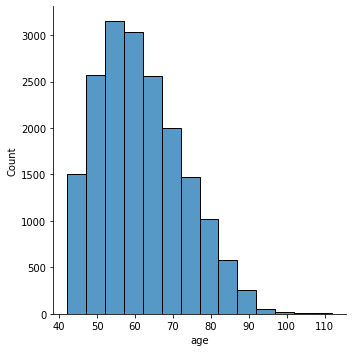

In [17]:
# Age Distribution of the customers

sns.displot(data=data,kind='hist',x='age',binwidth=5);

The age distribution of the consumers are mostly between 50 and 65 years old, while we have a few with over 90 years old.

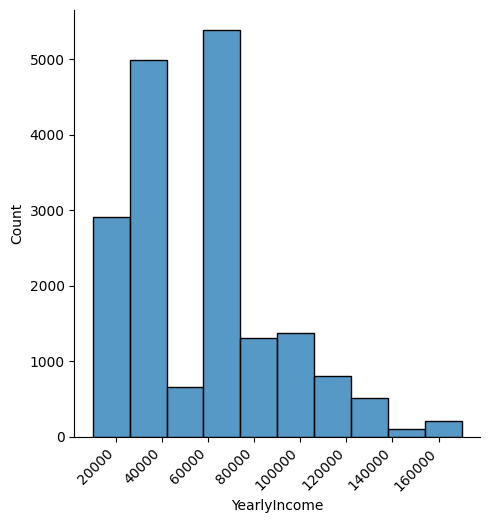

In [18]:
# Distribution of Income of Consumers
sns.displot(data=data,kind='hist',x='YearlyIncome',bins=10)
plt.xticks(rotation=45, ha='right');
plt.show()

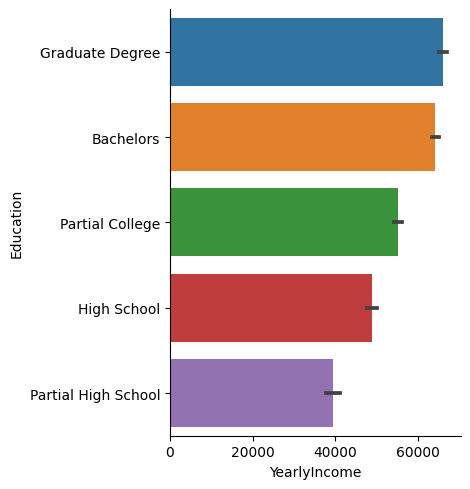

In [19]:
# Yearly Income by Education

sns.catplot(data=data,kind='bar',x='YearlyIncome',y='Education');

Consumers with Graduate and Bachelors' degrees have the highest distribution of income followed by those with Partial college college, while those with partial high school degree had the lowest distribution of income.  We expect income to influence demand for this commodity if it is a normal good.

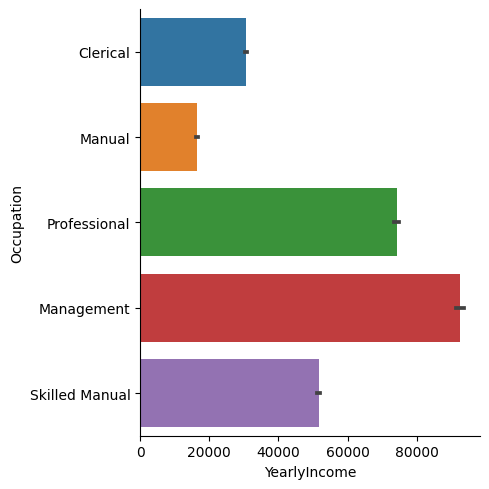

In [20]:
# Yearly Income by Occupation

sns.catplot(data=data,kind='bar',x='YearlyIncome',y='Occupation');

The income distribution according to occupational categories shows that those in management position have the highest distribution of income followed by those int he professional group.  Those in Manual category had the least distribution of income.

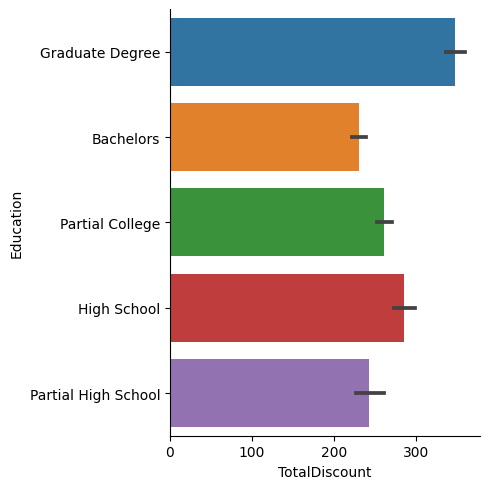

In [21]:
sns.catplot(data=data,kind='bar',x='TotalDiscount',y='Education');

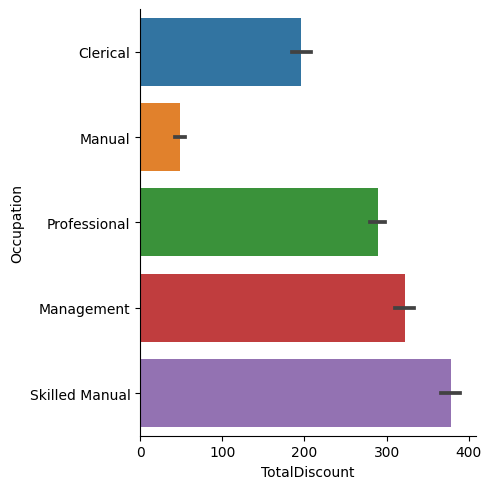

In [22]:
# Total Discount by Occupation

sns.catplot(data=data,kind='bar',x='TotalDiscount',y='Occupation');

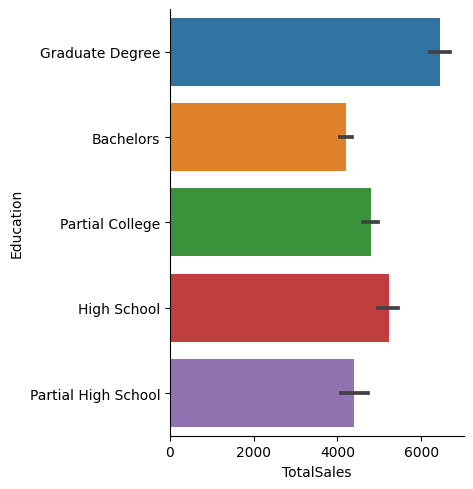

In [23]:
# Total Sales by Educational level

sns.catplot(data=data,kind='bar',x='TotalSales',y='Education');

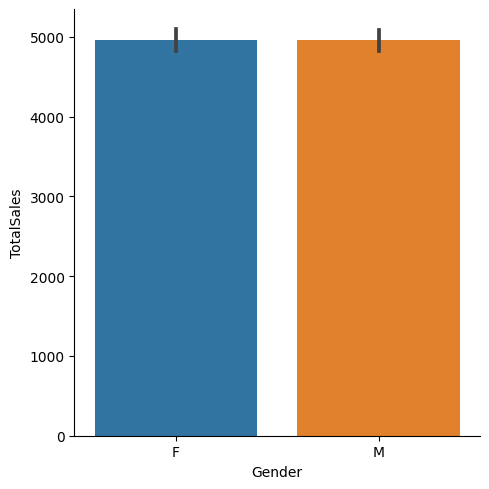

In [24]:
# Total Sales by Gender

sns.catplot(data=data,kind='bar',y='TotalSales',x='Gender');

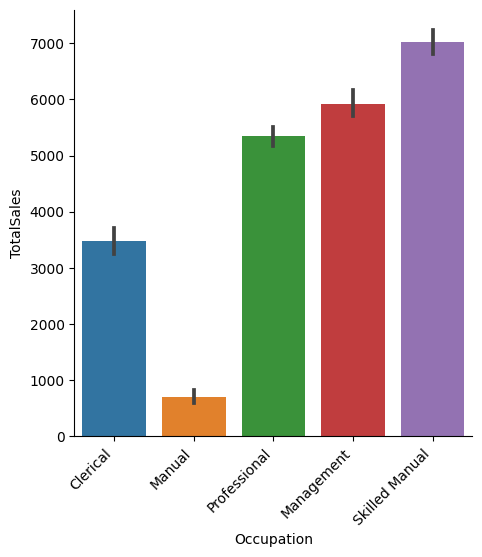

In [25]:
# Total Sales by Occupation

sns.catplot(data=data,kind='bar',y='TotalSales',x='Occupation')
plt.xticks(rotation = 45,ha='right');

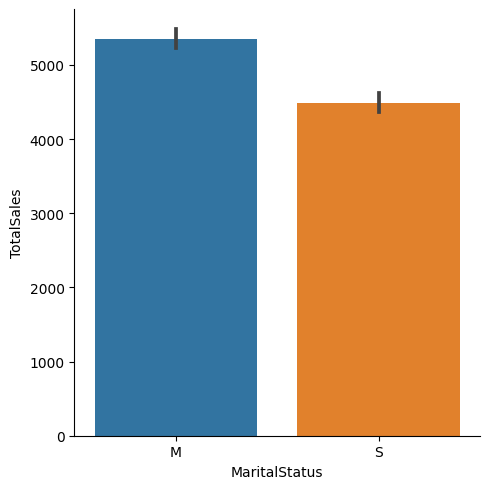

In [26]:
# Total sales by Marital status

sns.catplot(data=data,kind='bar',y='TotalSales',x='MaritalStatus');

### Check the distribution of discount by socio-demographics

In [27]:
data.head()

,MaritalStatus,Education,Occupation,Gender,YearlyIncome,TotalSales,TotalDiscount,discount,age
0,M,Graduate Degree,Clerical,F,30000,331.4082,50.1018,Yes,62
1,M,Graduate Degree,Clerical,F,30000,239.6235,21.9065,Yes,62
2,S,Graduate Degree,Clerical,M,30000,170.0351,31.5049,Yes,62
3,M,Bachelors,Clerical,M,30000,267.6381,45.3019,Yes,63
4,M,Bachelors,Clerical,F,30000,273.6371,39.3029,Yes,63


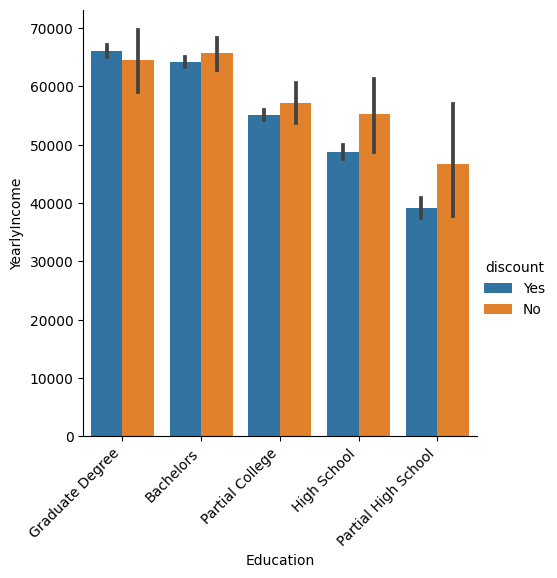

In [28]:
# Yearly Income by Education

sns.catplot(data=data,kind='bar',y='YearlyIncome',x='Education',hue='discount')
plt.xticks(rotation=45,ha='right');

The distribution of discount according to education and income shows that that the discount is almost evenly distribution among the professional groups.  This might not make a very good business sense except if all the consumers within the occupational categories responds well to the discount promotion.

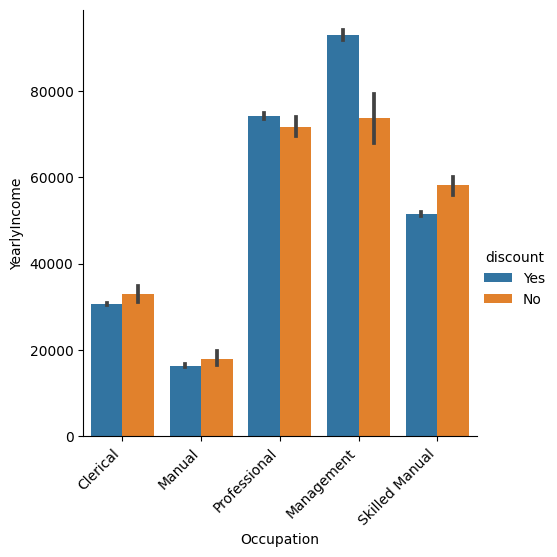

In [29]:
# Yearly Income by occupation

sns.catplot(data=data,kind='bar',y='YearlyIncome',x='Occupation',hue='discount')
plt.xticks(rotation=45,ha='right');

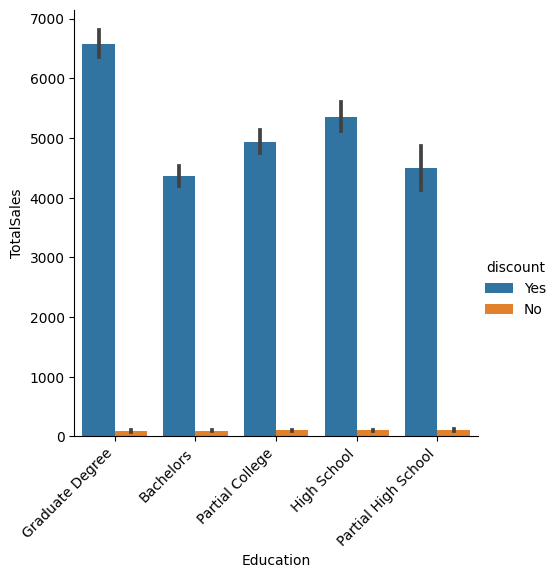

In [30]:
#  Sales and Discount Recieved

sns.catplot(data=data,kind='bar',y='TotalSales',x='Education',hue='discount')
plt.xticks(rotation=45,ha='right');

The distribution of those who did not receive discounts are evenly distributed across the educational categories while those that received the highest discount were found among those with Graduate degree followied by those with High School degree.  On the whole, it seems that those with Graduate degree responds much better than those in other categories.

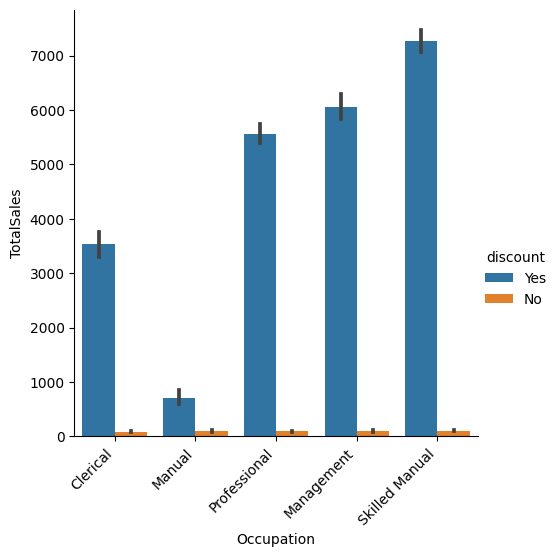

In [31]:
sns.catplot(data=data,kind='bar',y='TotalSales',x='Occupation',hue='discount')
plt.xticks(rotation=45,ha='right');

The distribution of sales vis-a-vis occupational categories shows that those with Skilled Manual recorded the highest sales followed by those in Managemenet and professional respectively.  Hence, it seems that those in Skilled manual occupational category responds more to discount promotion.